# 1 ДОМАШНЕЕ ЗАДАНИЕ.

## Геометрическое распределение

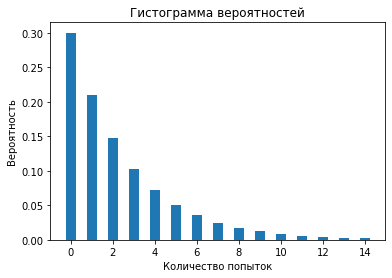

In [9]:
#построение гистограммы вероятностей
import numpy as np
import matplotlib.pyplot as plt
# функция вероятности геометрического распределения
def geomm(p, i):
    return (1 - p) ** i * p
mas = []
for i in range(15):
    mas.append(geomm(0.3, i))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(list(range(15)), mas,width=0.5)
ax.set_title("Гистограмма вероятностей")
ax.set_ylabel('Значение вероятности')
ax.set_xlabel('Количество попыток')
plt.show()

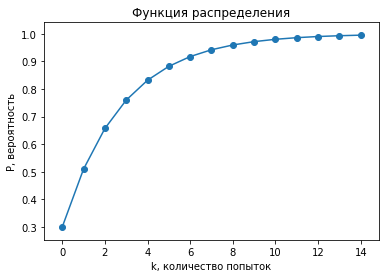

In [7]:
#построение функции распределения
import numpy as np
import matplotlib.pyplot as plt

def geomm(p, i):
    return (1 - p) ** i * p

s = 0
mas = []
for k in range(15):
    for i in range(k+1):
        s += geomm(0.3, i)
    mas.append(s)
    s = 0

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(list(range(15)), mas)
ax.scatter(list(range(15)), mas)
ax.set_ylabel('P, вероятность')
ax.set_xlabel('k, количество попыток')
ax.set_title('Функция распределения')
plt.show()

In [9]:
# моделирование случайной величины, имеющей геометрическое распределение
def my_geom_model(p):
    i = 0
    k = 0
    while i == 0:
        alpha = np.random.rand()
        if alpha < p:
            i = 1
        else:
            k = k + 1
    return k

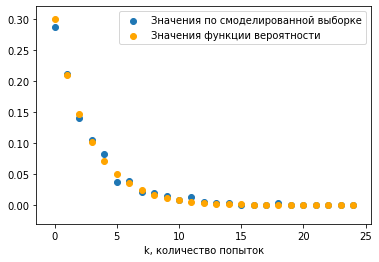

In [10]:
# сравнение функции вероятности смоделированной выборки с функцией вероятности геометрического распределения
def my_geom_model(p):
    i = 0
    k = 0
    while i == 0:
        alpha = np.random.rand()
        if alpha < p:
            i = 1
        else:
            k = k + 1
    return k


def geomm(p, i):
    return (1 - p) ** i * p


geom_arr = []
for i in range(1000):
    geom_arr.append(my_geom_model(0.3))
z = np.array(geom_arr)

mas_prob = []
for i in range(25):
    mas_prob.append((z == i).sum() / 1000)
    
mas = []
for i in range(25):
    mas.append(geomm(0.3, i))
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(list(range(25)), mas_prob, label='Значения по смоделированной выборке')
ax.scatter(list(range(25)), mas, color='orange', label='Значения функции вероятности')
ax.set_xlabel('k, количество попыток')
ax.legend()
plt.show()



## Нормальное распределение

In [11]:
# моделирование нормального распределения
import numpy as np
import math
def normal():
    while True:
        alpha1 = np.random.rand()
        alpha2 = np.random.rand()
        beta1 = 2 * alpha1 - 1
        beta2 = 2 * alpha2 - 1
        d = beta1 ** 2 + beta2 ** 2
        if d <= 1:
            break
    t = ((-2) * math.log(d) / d) ** (0.5)
    return beta1 * t

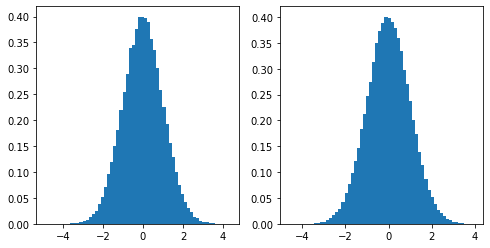

In [13]:
#сравнение выборки, смоделированной функцией, определенной выше (normal()) с выборкой, смоделированной функцямии python
import numpy as np
import math
def normal():
    while True:
        alpha1 = np.random.rand()
        alpha2 = np.random.rand()
        beta1 = 2 * alpha1 - 1
        beta2 = 2 * alpha2 - 1
        d = beta1 ** 2 + beta2 ** 2
        if d <= 1:
            break
    t = ((-2) * math.log(d) / d) ** (0.5)
    return beta1 * t

s = []
for i in range(100000):
    s.append(normal())
a = np.random.normal(0,1,100000)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax1.hist(s,60,density=True)
ax2.hist(a,60,density=True)
plt.show()

# 2 ДОМАШНЕЕ ЗАДАНИЕ

## Геометрическое распределение

In [14]:
# моделирование случайных величин
def my_geom_model(p):
    i = 0
    k = 0
    while i == 0:
        alpha = np.random.rand()
        if alpha < p:
            i = 1
        else:
            k = k + 1
    return k
# создает 25 файлов с выборками
mas = [5, 10, 100, 1000, 100000]
for i in range(len(mas)):
    for j in range(1, 6):
        mas1 = []
        for k in range(mas[i]):
            mas1.append(my_geom_model(0.3))
#        with open('file{}.txt'.format('{}_{}'.format(mas[i], j)), 'w') as file:
#            print(*mas1, file=file)

In [10]:
# нахождение значений эмпирической функции для выборок и нахождение верхних границ э.ф.
from collections import Counter
import numpy as np
import math
# функция, которая убирает повторяющиеся элементы массива
def f(l):
    n = []
    for i in l:
        if i not in n:
            n.append(i)
    return n

# эфр на выборке ( массив а) от значения b 
def funct(a, b):
    s = 0
    for i in range(len(a)):
        if a[i] < b:
            s +=1
        else:
            break
    return(s / len(a))



mas = [5, 10, 100, 1000, 100000]
for k1 in range(5):
    data = []
    maxs = []
    for i in range(len(mas)):
        data.append (np.loadtxt("file{}_{}.txt".format(mas[k1], i + 1), delimiter=' ', 
                                dtype=np.float))
    for i in range(len(data)):
        data[i].sort()
    for i in range(4):
        for j in range(i + 1, 5):
            max = -100000
            mas1 = sorted(f(np.concatenate([data[i], data[j]])))
            for k in range(len(mas1)):
                if math.fabs(funct(data[i],mas1[k]) - funct(data[j],mas1[k])) > max:
                    max = math.fabs(funct(data[i],mas1[k]) - funct(data[j],mas1[k]))
            maxs.append(max)
    print('n={}'.format(mas[k1]),maxs)

n=5 [0.4, 0.4, 0.4, 0.4, 0.20000000000000007, 0.6000000000000001, 0.6, 0.4, 0.4, 0.2]
n=10 [0.30000000000000004, 0.4, 0.19999999999999996, 0.4, 0.5, 0.20000000000000007, 0.10000000000000009, 0.4, 0.4, 0.3]
n=100 [0.08000000000000002, 0.030000000000000027, 0.06999999999999995, 0.030000000000000027, 0.06, 0.08000000000000002, 0.06, 0.07999999999999996, 0.050000000000000044, 0.08999999999999997]
n=1000 [0.018000000000000016, 0.025000000000000022, 0.027000000000000024, 0.03400000000000003, 0.02400000000000002, 0.028000000000000025, 0.041000000000000036, 0.028000000000000025, 0.04300000000000004, 0.03200000000000003]
n=100000 [0.0010000000000000009, 0.0017599999999999838, 0.002509999999999901, 0.0015499999999999403, 0.0026200000000000667, 0.0031199999999999006, 0.0021599999999999397, 0.0018700000000000383, 0.0013199999999999878, 0.0029000000000000137]


In [20]:
# построение вариационного ряда выборки и нахождение квантилей
# чтобы открыть выборки с разными n, надо поменять mas[0] на mas[1] и т.д
mas = [5, 10, 100, 1000, 100000]
data = []
for i in range(len(mas)):
    with open("file{}.txt".format('{}_{}'.format(mas[0], i + 1))) as f:
        for line in f:
            data.append(list([float(x) for x in line.split()]))
for i in range(5):
    data[i] = sorted(data[i])
print(data[0])
print(data[1])
print(data[2])
print(data[3])
print(data[4])

def quantiles(mas, value1 = 0.1, value2 = 0.5, value3 = 0.7):
    our_quantiles1 = []
    our_quantiles2 = []
    our_quantiles3 = []
    number1 = int(value1 * len(mas[1]) + 1)
    number2 = int(value2 * len(mas[1]) + 1)
    number3 = int(value3 * len(mas[1]) + 1)
    for i in range(5):
        our_quantiles1.append(mas[i][number1 - 1])
    for i in range(5):
        our_quantiles2.append(mas[i][number2 - 1])
    for i in range(5):
        our_quantiles3.append(mas[i][number3 - 1])
    print('при n = {} квантили уровня 0.1:'.format(len(mas[1]))),
    for i in range(len(our_quantiles1)):
        print(our_quantiles1[i])
    print('при n = {} квантили уровня 0.5:'.format(len(mas[1]))),
    for i in range(len(our_quantiles2)):
        print(our_quantiles2[i])
    print('при n = {} квантили уровня 0.7:'.format(len(mas[1]))),
    for i in range(len(our_quantiles3)):
        print(our_quantiles3[i])

quantiles(data)

data = []
for i in range(len(mas)):
    with open("file{}.txt".format('{}_{}'.format(mas[1], i + 1))) as f:
        for line in f:
            data.append(list([float(x) for x in line.split()]))
for i in range(5):
    data[i] = sorted(data[i])
print(data[0])
print(data[1])
print(data[2])
print(data[3])
print(data[4])
quantiles(data)

data = []
for i in range(len(mas)):
    with open("file{}.txt".format('{}_{}'.format(mas[2], i + 1))) as f:
        for line in f:
            data.append(list([float(x) for x in line.split()]))
for i in range(5):
    data[i] = sorted(data[i])
quantiles(data)

data = []
for i in range(len(mas)):
    with open("file{}.txt".format('{}_{}'.format(mas[3], i + 1))) as f:
        for line in f:
            data.append(list([float(x) for x in line.split()]))
for i in range(5):
    data[i] = sorted(data[i])
quantiles(data)

data = []
for i in range(len(mas)):
    with open("file{}.txt".format('{}_{}'.format(mas[4], i + 1))) as f:
        for line in f:
            data.append(list([float(x) for x in line.split()]))
quantiles(data)


[0.0, 0.0, 1.0, 10.0, 10.0]
[0.0, 0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0, 2.0]
[0.0, 1.0, 2.0, 3.0, 6.0]
[0.0, 0.0, 2.0, 3.0, 3.0]
при n = 5 квантили уровня 0.1:
0.0
0.0
0.0
0.0
0.0
при n = 5 квантили уровня 0.5:
1.0
0.0
0.0
2.0
2.0
при n = 5 квантили уровня 0.7:
10.0
0.0
1.0
3.0
3.0
[0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 4.0, 4.0, 8.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 2.0, 3.0, 7.0]
[0.0, 0.0, 1.0, 1.0, 4.0, 5.0, 5.0, 6.0, 8.0, 9.0]
[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 2.0, 4.0, 4.0, 5.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
при n = 10 квантили уровня 0.1:
1.0
0.0
0.0
0.0
0.0
при n = 10 квантили уровня 0.5:
2.0
1.0
5.0
1.0
1.0
при n = 10 квантили уровня 0.7:
4.0
2.0
6.0
4.0
3.0
при n = 100 квантили уровня 0.1:
0.0
0.0
0.0
0.0
0.0
при n = 100 квантили уровня 0.5:
1.0
2.0
1.0
1.0
1.0
при n = 100 квантили уровня 0.7:
3.0
3.0
3.0
2.0
3.0
при n = 1000 квантили уровня 0.1:
0.0
0.0
0.0
0.0
0.0
при n = 1000 квантили уровня 0.5:
2.0
2.0
2.0
1.0
1.0
при n = 1000 квантили уровня 0.7:
3.

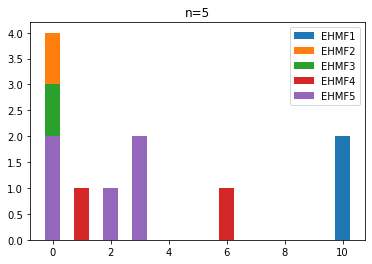

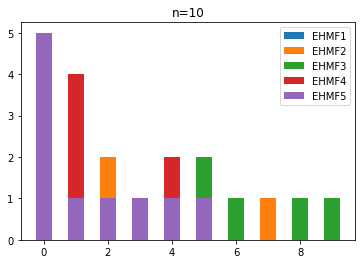

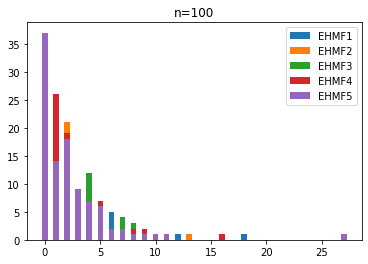

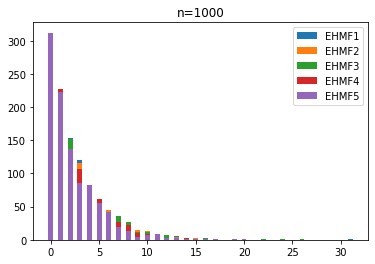

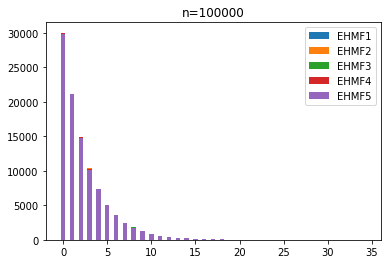

In [21]:
# построение гистограмм частот
from collections import Counter
import matplotlib.pyplot as plt
mas = [5, 10, 100, 1000, 100000]
for k in range(5):
    data = []
    for i in range(len(mas)):
        with open("file{}.txt".format('{}_{}'.format(mas[k], i + 1))) as f:
            for line in f:
                data.append(list([float(x) for x in line.split()]))
    for i in range(5):
        data[i] = Counter(data[i])
    width = 0.5
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in range(5):
        ax.bar(list(data[i].keys()), list(data[i].values()), width, label='EHMF{}'.format(i+1))
    ax.set_title('n={}'.format(sum(list(data[0].values()))))
    ax.legend()
    plt.show()



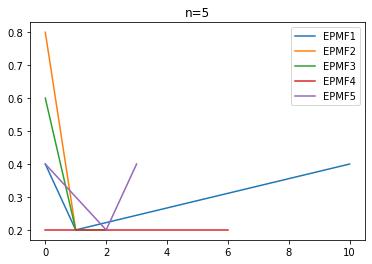

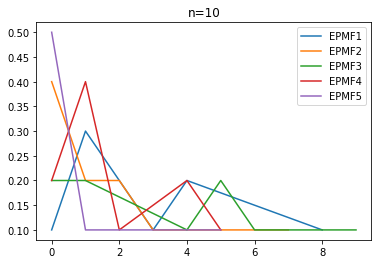

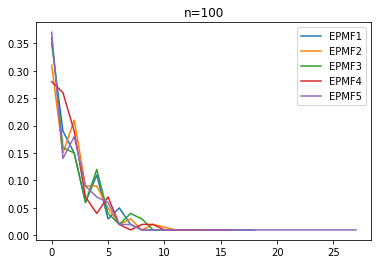

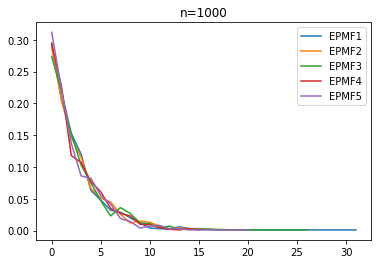

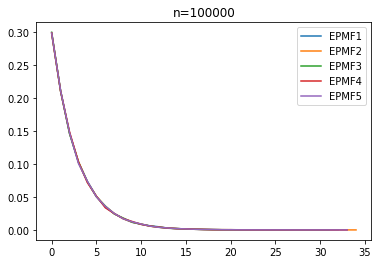

In [25]:
# построение полигонов частот
from collections import Counter
import matplotlib.pyplot as plt

def geomm(p, i):
    return (1 - p) ** i * p

mas = [5, 10, 100, 1000, 100000]
for k in range(5):
    data = []
    for i in range(len(mas)):
        with open("file{}.txt".format('{}_{}'.format(mas[k], i + 1))) as f:
            for line in f:
                data.append(list([float(x) for x in line.split()]))
    for j in range(5):
        data[j] = sorted(data[j])
    for j in range(5):
        data[j] = Counter(data[j])
    summ = sum(data[1].values())
    our_mas = []
    for i in range(5):
        our_dict = {}
        for key in data[i].keys():
            our_dict[key] = data[i][key] / summ
        our_mas.append(our_dict)
    
    d = []
    for i in range(20):
        d.append(geomm(0.3, i))
    width = 0.5
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in range(5):
        ax.plot(list(our_mas[i].keys()), list(our_mas[i].values()), label='EPMF{}'.format(i + 1))
    ax.set_title('n={}'.format(mas[k]))
    ax.legend()
    plt.show()

## Нормальное распределение

In [3]:
# моделирование случайной величины, имеющей нормальное стандартное распределение
import numpy as np
import math
def normal():
    while True:
        alpha1 = np.random.rand()
        alpha2 = np.random.rand()
        beta1 = 2 * alpha1 - 1
        beta2 = 2 * alpha2 - 1
        d = beta1 ** 2 + beta2 ** 2
        if d <= 1:
            break
    t = ((-2) * math.log(d) / d) ** (0.5)
    return beta1 * t

# создает 25 файлов с выборками
mas = [5, 10, 100, 1000, 100000]
for i in range(len(mas)):
    for j in range(1, 6):
        mas1 = []
        for k in range(mas[i]):
            mas1.append(normal())
        with open('filenormal{}.txt'.format('{}_{}'.format(mas[i], j)), 'w') as file:
            print(*mas1, file=file)

In [1]:
# нахождение значений эмпирической функции для выборок и нахождение верхних границ э.ф.
from collections import Counter
import numpy as np
import math
# функция, которая убирает повторяющиеся элементы массива
def f(l):
    n = []
    for i in l:
        if i not in n:
            n.append(i)
    return n

# эфр на выборке ( массив а) от значения b 
def funct(a, b):
    s = 0
    for i in range(len(a)):
        if a[i] < b:
            s +=1
        else:
            break
    return(s / len(a))



mas = [5, 10, 100, 1000, 100000]
for k1 in range(4):
    data = []
    maxs = []
    for i in range(len(mas)):
        data.append (np.loadtxt("filenormal{}_{}.txt".format(mas[k1], i + 1), delimiter=' ', 
                                dtype=np.float))
    for i in range(len(data)):
        data[i].sort()
    for i in range(4):
        for j in range(i + 1, 5):
            max = -100000
            mas1 = sorted(f(np.concatenate([data[i], data[j]])))
            for k in range(len(mas1)):
                if math.fabs(funct(data[i],mas1[k]) - funct(data[j],mas1[k])) > max:
                    max = math.fabs(funct(data[i],mas1[k]) - funct(data[j],mas1[k]))
            maxs.append(max)
    print('n={}'.format(mas[k1]),maxs)

n=5 [0.4, 0.20000000000000007, 0.6, 0.4, 0.4, 0.8, 0.6000000000000001, 0.8, 0.20000000000000007, 0.6]
n=10 [0.30000000000000004, 0.30000000000000004, 0.4, 0.30000000000000004, 0.20000000000000007, 0.4, 0.3, 0.4, 0.3, 0.30000000000000004]
n=100 [0.13, 0.12000000000000005, 0.18, 0.07000000000000006, 0.08999999999999997, 0.25000000000000006, 0.10000000000000009, 0.25000000000000006, 0.11000000000000004, 0.17]
n=1000 [0.027000000000000024, 0.05399999999999994, 0.041000000000000036, 0.040999999999999925, 0.049000000000000044, 0.03200000000000003, 0.03900000000000001, 0.038000000000000034, 0.050000000000000044, 0.031000000000000028]


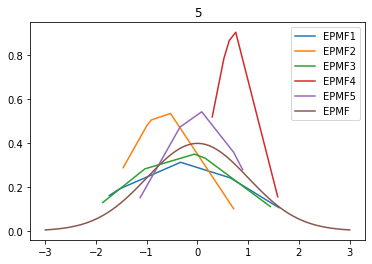

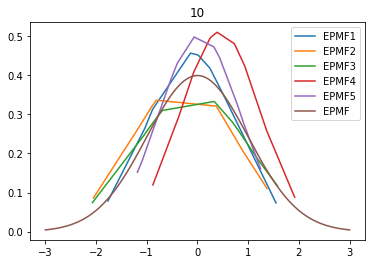

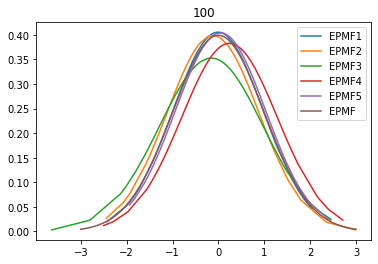

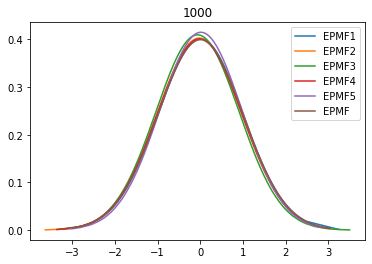

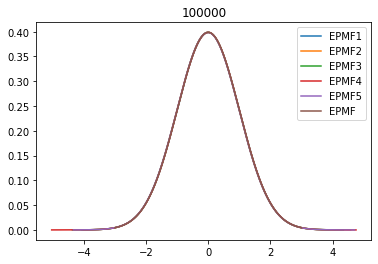

In [12]:
# построение полигонов частот
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
mas = [5, 10, 100, 1000, 100000]
for k in range(5):
    data = []
    for i in range(5):
        with open("filenormal{}.txt".format('{}_{}'.format(mas[k], i + 1))) as f:
            for line in f:
                data.append(list([float(x) for x in line.split()]))
    for i in range(5):
        data[i] = sorted(data[i])
    x = np.linspace(-3, 3, 100000)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in range(5):
        ax.plot(data[i], stats.norm.pdf(data[i], np.mean(data[i]), np.std(data[i])), 
                label='EPMF{}'.format(i+1))
    ax.plot(x, stats.norm.pdf(x, 0, 1), label='EPMF')
    ax.set_title('{}'.format(mas[k]))
    ax.legend()
    plt.show()

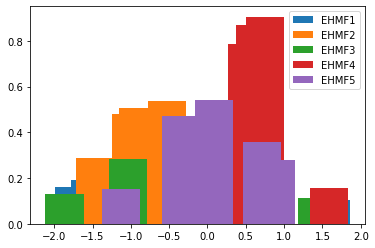

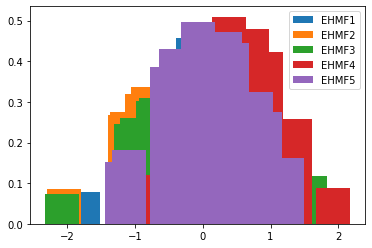

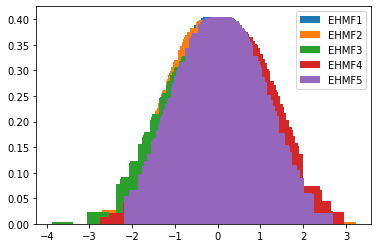

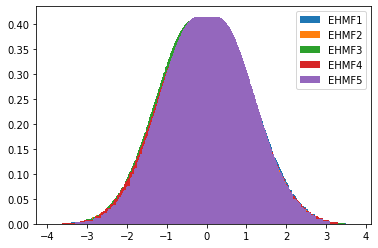

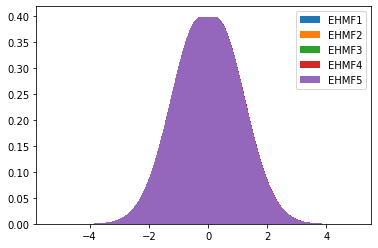

In [6]:
# построение гистограмм частот
from collections import Counter
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
mas = [5, 10, 100, 1000, 100000]
for k in range(5):
    data = []
    for i in range(len(mas)):
        with open("filenormal{}.txt".format('{}_{}'.format(mas[k], i + 1))) as f:
            for line in f:
                data.append(list([float(x) for x in line.split()]))
    #for i in range(5):
    #    data[i] = Counter(data[i])
    width = 0.5
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in range(5):
        ax.bar(data[i], stats.norm.pdf(data[i], np.mean(data[i]), np.std(data[i])), width, 
               label='EHMF{}'.format(i+1))
    #ax.set_title('n={}'.format(sum(list(data[0].values()))))
    ax.legend()
    plt.show()

# 3 ДОМАШНЕЕ ЗАДАНИЕ

## Геометрическое распределение.

In [4]:
# нахождение выборочного среднего
from collections import Counter
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
mas = [5, 10, 100, 1000, 100000]
for k in range(5):
    data = []
    for i in range(len(mas)):
        with open("file{}.txt".format('{}_{}'.format(mas[k], i + 1))) as f:
            for line in f:
                data.append(list([float(x) for x in line.split()]))
    for m in range(len(data)):
        sample_mean = sum(data[m]) / len(data[m])
        print("Выборочное среднее для {} выборки при n = {}:".format(m+1, len(data[m])), sample_mean)

Выборочное среднее для 1 выборки при n = 5: 4.2
Выборочное среднее для 2 выборки при n = 5: 0.2
Выборочное среднее для 3 выборки при n = 5: 0.6
Выборочное среднее для 4 выборки при n = 5: 2.4
Выборочное среднее для 5 выборки при n = 5: 1.6
Выборочное среднее для 1 выборки при n = 10: 2.6
Выборочное среднее для 2 выборки при n = 10: 1.6
Выборочное среднее для 3 выборки при n = 10: 3.9
Выборочное среднее для 4 выборки при n = 10: 1.9
Выборочное среднее для 5 выборки при n = 10: 1.5
Выборочное среднее для 1 выборки при n = 100: 2.19
Выборочное среднее для 2 выборки при n = 100: 2.28
Выборочное среднее для 3 выборки при n = 100: 2.15
Выборочное среднее для 4 выборки при n = 100: 2.15
Выборочное среднее для 5 выборки при n = 100: 2.26
Выборочное среднее для 1 выборки при n = 1000: 2.336
Выборочное среднее для 2 выборки при n = 1000: 2.39
Выборочное среднее для 3 выборки при n = 1000: 2.496
Выборочное среднее для 4 выборки при n = 1000: 2.309
Выборочное среднее для 5 выборки при n = 1000: 2.

In [21]:
# нахождение выборочной дисперсии
from collections import Counter
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
mas = [5, 10, 100, 1000, 100000]
#  нахождение выборочных средних и запись их в массив sample_means
for k in range(5):
    sample_variance = []
    sample_mean = []
    data = []
    for i in range(len(mas)):
        with open("file{}.txt".format('{}_{}'.format(mas[k], i + 1))) as f:
            for line in f:
                data.append(list([float(x) for x in line.split()]))
    for m in range(len(data)):
        sample_mean.append( sum(data[m]) / len(data[m]))
    for n in range(5):
        my_summ = 0
        for n1 in range(len(data[n])):
            my_summ = my_summ + (data[n][n1] - sample_mean[n])**2
        my_summ = my_summ / len(data[n])
        sample_variance.append(my_summ)
    for k in range(len(sample_variance)):
        print("Для {} выборки при n = {}:".format(k+1, len(data[1])), 
              sample_variance[k])

Для 1 выборки при n = 5: 22.56
Для 2 выборки при n = 5: 0.16000000000000003
Для 3 выборки при n = 5: 0.6399999999999999
Для 4 выборки при n = 5: 4.24
Для 5 выборки при n = 5: 1.8400000000000003
Для 1 выборки при n = 10: 4.84
Для 2 выборки при n = 10: 4.24
Для 3 выборки при n = 10: 9.689999999999998
Для 4 выборки при n = 10: 2.8899999999999997
Для 5 выборки при n = 10: 3.25
Для 1 выборки при n = 100: 8.353900000000019
Для 2 выборки при n = 100: 6.641599999999995
Для 3 выборки при n = 100: 6.007499999999997
Для 4 выборки при n = 100: 7.087499999999989
Для 5 выборки при n = 100: 11.832400000000009
Для 1 выборки при n = 1000: 8.051103999999942
Для 2 выборки при n = 1000: 7.3898999999999635
Для 3 выборки при n = 1000: 9.121984000000017
Для 4 выборки при n = 1000: 6.727519000000014
Для 5 выборки при n = 1000: 7.281824000000039
Для 1 выборки при n = 100000: 7.791401913602224
Для 2 выборки при n = 100000: 7.75286979159975
Для 3 выборки при n = 100000: 7.717455640006899
Для 4 выборки при n = 10

In [16]:
#cравнение истинного значения и оценки 
from collections import Counter
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
mas = [5, 10, 100, 1000, 100000]
for k in range(5):
    data = []
    for i in range(len(mas)):
        with open("file{}.txt".format('{}_{}'.format(mas[k], i + 1))) as f:
            for line in f:
                data.append(list([float(x) for x in line.split()]))
    for m in range(len(data)):
        sample_mean = sum(data[m]) / len(data[m])
        print("параметр theta  = 0.3,", 'разница: ',abs(0.3- 1 / (1 + sample_mean)),
              'при n = {}'.format(mas[k]))

параметр theta  = 0.3, разница:  0.1076923076923077 при n = 5
параметр theta  = 0.3, разница:  0.5333333333333334 при n = 5
параметр theta  = 0.3, разница:  0.325 при n = 5
параметр theta  = 0.3, разница:  0.00588235294117645 при n = 5
параметр theta  = 0.3, разница:  0.08461538461538459 при n = 5
параметр theta  = 0.3, разница:  0.0222222222222222 при n = 10
параметр theta  = 0.3, разница:  0.08461538461538459 при n = 10
параметр theta  = 0.3, разница:  0.09591836734693879 при n = 10
параметр theta  = 0.3, разница:  0.044827586206896586 при n = 10
параметр theta  = 0.3, разница:  0.10000000000000003 при n = 10
параметр theta  = 0.3, разница:  0.013479623824451448 при n = 100
параметр theta  = 0.3, разница:  0.004878048780487809 при n = 100
параметр theta  = 0.3, разница:  0.017460317460317454 при n = 100
параметр theta  = 0.3, разница:  0.017460317460317454 при n = 100
параметр theta  = 0.3, разница:  0.006748466257668728 при n = 100
параметр theta  = 0.3, разница:  0.0002398081534771

In [4]:
# работа с данными. Так как в файле находятся количество попыток, то нужно из каждой величины вычесть 1, 
#чтобы было количество неудач
import numpy as np
data = np.loadtxt('pregnant.txt')
data = data - 1
print(len(data)) # количество данных

[2. 1. 2. ... 2. 2. 2.]
[1. 0. 1. ... 1. 1. 1.]
1336


[0.4782934131736527, 0.22904191616766467, 0.12125748502994012, 0.05913173652694611, 0.030688622754491017, 0.02694610778443114, 0.020209580838323353, 0.010479041916167664, 0.009730538922155689, 0.002245508982035928, 0.002245508982035928, 0.0, 0.004491017964071856, 0.0, 0.0, 0.0029940119760479044, 0.0, 0.0014970059880239522, 0.0, 0.0007485029940119761]


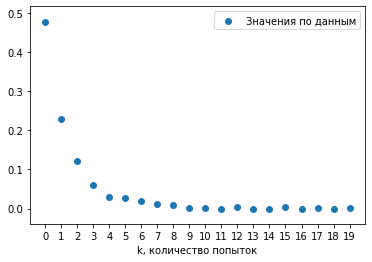

In [12]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('pregnant.txt')
mas_prob = []
data = data - 1
for i in range(20):
    mas_prob.append((data == i).sum() / len(data))
print(mas_prob)
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(list(range(20)), mas_prob, label='Значения по данным')
#ax.scatter(list(range(25)), mas, color='orange', label='Значения функции вероятности')
ax.set_xlabel('k, количество попыток')
ax.set_xticks(list(range(20)))
ax.legend()
plt.show()


[0.4782934131736527, 0.22904191616766467, 0.12125748502994012, 0.05913173652694611, 0.030688622754491017, 0.02694610778443114, 0.020209580838323353, 0.010479041916167664, 0.009730538922155689, 0.002245508982035928, 0.002245508982035928, 0.0, 0.004491017964071856, 0.0, 0.0, 0.0029940119760479044, 0.0, 0.0014970059880239522, 0.0, 0.0007485029940119761]


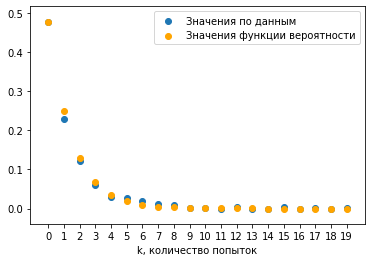

In [15]:
#сравнение
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('pregnant.txt')
mas_prob = []
data = data - 1
for i in range(20):
    mas_prob.append((data == i).sum() / len(data))

def my_geom(n):
    p = 0.4782934131736527
    q = 1 - 0.4782934131736527
    mas = []
    for i in range(n):
        mas.append(p * q **i)
    return mas

mas = my_geom(20)
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(list(range(20)), mas_prob, label='Значения по данным')
ax.scatter(list(range(20)), mas, color='orange', label='Значения функции вероятности')
ax.set_xlabel('k, количество попыток')
ax.set_xticks(list(range(20)))
ax.legend()
plt.show()

In [21]:
# нахождение выборочного среднего:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('pregnant.txt')
data = data - 1
print('выборочное среднее:', sum(data)/ len(data), )
print('мат. ожидание: ',(1 - 0.4782934131736527) /0.4782934131736527 )

выборочное среднее: 1.3600299401197604
мат. ожидание:  1.0907668231611893


In [26]:
# нахождение выборочной дисперсии
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('pregnant.txt')
data = data - 1
sample_mean = sum(data) / len(data)
data = data - sample_mean
data = data**2
print('выборочная дисперсия:', sum(data) / len(data))

выборочная дисперсия: 4.854659879343125


In [27]:
#дисперсия
(1 - 0.4782934131736527) /0.4782934131736527**2

2.2805390856703425

In [29]:
# нахождение значения оценки
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('pregnant.txt')
data = data - 1
sample_mean = sum(data) / len(data)
print('значение оценки: ',1 / (1 + sample_mean))

значение оценки:  0.4237234379955598


## Нормальное распределение

In [1]:
# нахождение выборочного среднего
from collections import Counter
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
mas = [5, 10, 100, 1000, 100000]
for k in range(5):
    data = []
    for i in range(len(mas)):
        with open("filenormal{}.txt".format('{}_{}'.format(mas[k], i + 1))) as f:
            for line in f:
                data.append(list([float(x) for x in line.split()]))
    for m in range(len(data)):
        sample_mean = sum(data[m]) / len(data[m])
        print("Выборочное среднее для {} выборки при n = {}:".format(m+1, len(data[m])), 
              sample_mean)

Выборочное среднее для 1 выборки при n = 5: -0.2708405578252721
Выборочное среднее для 2 выборки при n = 5: -0.6377889974206727
Выборочное среднее для 3 выборки при n = 5: -0.2743506705260973
Выборочное среднее для 4 выборки при n = 5: 0.755177080247742
Выборочное среднее для 5 выборки при n = 5: 0.042723183663180266
Выборочное среднее для 1 выборки при n = 10: -0.1237823054190523
Выборочное среднее для 2 выборки при n = 10: -0.2632280742355674
Выборочное среднее для 3 выборки при n = 10: -0.09190958460225529
Выборочное среднее для 4 выборки при n = 10: 0.45172116921611344
Выборочное среднее для 5 выборки при n = 10: 0.04402797401851383
Выборочное среднее для 1 выборки при n = 100: -0.008602079524551037
Выборочное среднее для 2 выборки при n = 100: -0.11789027740965569
Выборочное среднее для 3 выборки при n = 100: -0.15479204315871456
Выборочное среднее для 4 выборки при n = 100: 0.24174822544426394
Выборочное среднее для 5 выборки при n = 100: 0.045750024689120955
Выборочное среднее д

In [1]:
# нахождение выборочной дисперсии 
from collections import Counter
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
mas = [5, 10, 100, 1000, 100000]
#  нахождение выборочных средних и запись их в массив sample_means
for k in range(5):
    sample_variance = []
    sample_mean = []
    data = []
    for i in range(len(mas)):
        with open("filenormal{}.txt".format('{}_{}'.format(mas[k], i + 1))) as f:
            for line in f:
                data.append(list([float(x) for x in line.split()]))
    for m in range(len(data)):
        sample_mean.append( sum(data[m]) / len(data[m]))
    for n in range(5):
        my_summ = 0
        for n1 in range(len(data[n])):
            my_summ = my_summ + (data[n][n1] - sample_mean[n])**2
        my_summ = my_summ / len(data[n])
        sample_variance.append(my_summ)
    for k in range(len(sample_variance)):
        print("Для {} выборки при n = {}:".format(k+1, len(data[1])), 
              sample_variance[k])

Для 1 выборки при n = 5: 1.6229238495478202
Для 2 выборки при n = 5: 0.5436951288003978
Для 3 выборки при n = 5: 1.2528516633328497
Для 4 выборки при n = 5: 0.1940371845120735
Для 5 выборки при n = 5: 0.538074044717748
Для 1 выборки при n = 10: 0.7645423815066699
Для 2 выборки при n = 10: 1.0628396887856302
Для 3 выборки при n = 10: 1.2458522731469277
Для 4 выборки при n = 10: 0.6088129087854264
Для 5 выборки при n = 10: 0.6308402024247972
Для 1 выборки при n = 100: 0.9685855080959697
Для 2 выборки при n = 100: 1.0017977333772685
Для 3 выборки при n = 100: 1.2808710400896026
Для 4 выборки при n = 100: 1.0872740702926316
Для 5 выборки при n = 100: 0.9752242061118053
Для 1 выборки при n = 1000: 0.990550326390373
Для 2 выборки при n = 1000: 0.9829726165711664
Для 3 выборки при n = 1000: 0.9507956791408639
Для 4 выборки при n = 1000: 0.991346861969709
Для 5 выборки при n = 1000: 0.9263292215864997
Для 1 выборки при n = 100000: 1.0025223449606422
Для 2 выборки при n = 100000: 1.000495561291

In [15]:
#сравнение истинного значения и оценки для мю
from collections import Counter
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
mas = [5, 10, 100, 1000, 100000]
for k in range(5):
    data = []
    for i in range(len(mas)):
        with open("filenormal{}.txt".format('{}_{}'.format(mas[k], i + 1))) as f:
            for line in f:
                data.append(list([float(x) for x in line.split()]))
    for m in range(len(data)):
        sample_mean = sum(data[m]) / len(data[m])
        print("Для {} выборки при n = {} разница: ".format(m+1, len(data[m])), 
              abs(sample_mean - 0))

Для 1 выборки при n = 5 разница:  0.2708405578252721
Для 2 выборки при n = 5 разница:  0.6377889974206727
Для 3 выборки при n = 5 разница:  0.2743506705260973
Для 4 выборки при n = 5 разница:  0.755177080247742
Для 5 выборки при n = 5 разница:  0.042723183663180266
Для 1 выборки при n = 10 разница:  0.1237823054190523
Для 2 выборки при n = 10 разница:  0.2632280742355674
Для 3 выборки при n = 10 разница:  0.09190958460225529
Для 4 выборки при n = 10 разница:  0.45172116921611344
Для 5 выборки при n = 10 разница:  0.04402797401851383
Для 1 выборки при n = 100 разница:  0.008602079524551037
Для 2 выборки при n = 100 разница:  0.11789027740965569
Для 3 выборки при n = 100 разница:  0.15479204315871456
Для 4 выборки при n = 100 разница:  0.24174822544426394
Для 5 выборки при n = 100 разница:  0.045750024689120955
Для 1 выборки при n = 1000 разница:  0.0032225205413249484
Для 2 выборки при n = 1000 разница:  0.026637175287282818
Для 3 выборки при n = 1000 разница:  0.06858668205861544
Для 4

In [13]:
#сравнение истинного значения и оценки для сигма^2
from collections import Counter
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
mas = [5, 10, 100, 1000, 100000]
#  нахождение выборочных средних и запись их в массив sample_means
for k in range(5):
    sample_variance = []
    data = []
    for i in range(len(mas)):
        with open("filenormal{}.txt".format('{}_{}'.format(mas[k], i + 1))) as f:
            for line in f:
                data.append(list([float(x) for x in line.split()]))
    for m in range(len(data)):
        sample_mean.append( sum(data[m]) / len(data[m]))
    for n in range(5):
        my_summ = 0
        for n1 in range(len(data[n])):
            my_summ = my_summ + (data[n][n1] - 0**2)**2
        my_summ = my_summ / len(data[n])
        sample_variance.append(my_summ)
    for k in range(len(sample_variance)):
        print("Для {} выборки при n = {} разница: ".format(k+1, len(data[1])), 
              abs(sample_variance[k]-1))

Для 1 выборки при n = 5 разница:  0.6962784573109251
Для 2 выборки при n = 5 разница:  0.049530065968735215
Для 3 выборки при n = 5 разница:  0.3281199537509685
Для 4 выборки при n = 5 разница:  0.23567039295642178
Для 5 выборки при n = 5 разница:  0.46010068485993405
Для 1 выборки при n = 10 разница:  0.22013555935847462
Для 2 выборки при n = 10 разница:  0.13212870785139552
Для 3 выборки при n = 10 разница:  0.2542996448886865
Для 4 выборки при n = 10 разница:  0.18713507649660122
Для 5 выборки при n = 10 разница:  0.36722133507902777
Для 1 выборки при n = 100 разница:  0.031340496131883944
Для 2 выборки при n = 100 разница:  0.01569585088499381
Для 3 выборки при n = 100 разница:  0.30483161671485215
Для 4 выборки при n = 100 разница:  0.14571627479808247
Для 5 выборки при n = 100 разница:  0.02268272912913971
Для 1 выборки при n = 1000 разница:  0.009439288970986115
Для 2 выборки при n = 1000 разница:  0.016317844321548036
Для 3 выборки при n = 1000 разница:  0.04450018790332677
Для

### Работа с данными

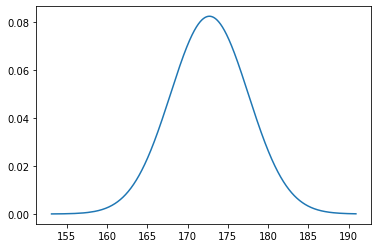

In [30]:
# построим график на основе данных
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
a = pd.read_csv('height.txt',sep = '\t')
c = a['Height'].tolist()
c.sort()
c = np.array(c)
# перевод в метрическую систему
c = c * 2.54
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(c, stats.norm.pdf(c, np.mean(c), np.std(c)))
plt.show()


In [39]:
# найдем мат ожидание и дисперсию
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
a = pd.read_csv('height.txt',sep = '\t')
c = a['Height'].tolist()
c.sort()
c = np.array(c)
c = c * 2.54
print('мат. ожидание: ', np.mean(c))
print('дисперсия: ', np.std(c)**2)
print('сигма: ', np.std(c))

мат. ожидание:  172.70250853587203
дисперсия:  23.33051781350413
$\sigma$:  4.830167472614602


In [38]:
# найдем выборочное среднее и выборочную дисперсию:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
a = pd.read_csv('height.txt',sep = '\t')
c = a['Height'].tolist()
c.sort()
c = np.array(c)
c = c * 2.54
sample_mean = sum(c) / len(c)
print('выборочное среднее: ', sample_mean)
print('выборочная дисперсия: ', sum((c - sample_mean)** 2) / len(c) )


выборочное среднее:  172.70250853587117
выборочная дисперсия:  23.330517813504198


In [41]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
a = pd.read_csv('height.txt',sep = '\t')
c = a['Height'].tolist()
length = len(c)
c.sort()
c = np.array(c)
c = c * 2.54
c = c[c < (172.70250853587117 + 4.830167472614602)]
c = c[c > (172.70250853587117 - 4.830167472614602) ]
print(len(c) / length * 100)

68.356


In [42]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
a = pd.read_csv('height.txt',sep = '\t')
c = a['Height'].tolist()
length = len(c)
c.sort()
c = np.array(c)
c = c * 2.54
c = c[c < (172.70250853587117 + 2 *4.830167472614602)]
c = c[c > (172.70250853587117 - 2 *4.830167472614602) ]
print(len(c) / length * 100)

95.46


In [43]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
a = pd.read_csv('height.txt',sep = '\t')
c = a['Height'].tolist()
length = len(c)
c.sort()
c = np.array(c)
c = c * 2.54
c = c[c < (172.70250853587117 + 3 *4.830167472614602)]
c = c[c > (172.70250853587117 - 3 *4.830167472614602) ]
print(len(c) / length * 100)

99.79599999999999


# Домашнее задание 4. Геометрическое распределение

In [92]:
# проверка простой гипотезы в критерии согласия для РЕАЛЬНЫХ ДАННЫХ
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
p = 0.4782934131736527 # значение успеха
p1 = 0.4237234379955598 # значение оценки
data = np.loadtxt('pregnant.txt')
n = len(data)
data = np.sort(data)
data = data - 1
for k in [p,p1]:
    def geom(x):
        return (1-k)**x * k
    mas_x = []
    mas_ni = []
    a = Counter(data)
    for i in a.keys():
        mas_x.append(i)
    for i in a.values():
        mas_ni.append(i)
    sum = 0
    for i in range(len(mas_x)):
        sum = sum +  mas_ni[i]**2 / (n * geom(mas_x[i]))
    sum = sum - n
    print(sum, 'при p = {}'.format(k))
print('значения, которые принимает наша случайная величина: ',mas_x)

1376.4568138724821 при p = 0.4782934131736527
317.5574954134611 при p = 0.4237234379955598
значения, которые принимает наша случайная величина:  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0, 15.0, 17.0, 19.0]


In [26]:
# проверка простой гипотезы в критерии согласия для CМОДЕЛИРОВАННЫХ ДАННЫХ
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
n = 10**5
def geom(x):
        return (1-0.3)**x * 0.3
for k in range(1,6):
    data = []
    data = np.loadtxt('file100000_{}.txt'.format(k))
    data = np.sort(data)
    mas_x = []
    mas_ni = []
    sum = 0
    a = Counter(data)
    for i in a.keys():
        mas_x.append(i)
    for i in a.values():
        mas_ni.append(i)
    sum = 0
    for i in range(len(mas_x)):
        sum = sum +  mas_ni[i]**2 / (n * geom(mas_x[i]))
    sum = sum - n
    print(sum, ' у {} выборки'.format(k))
    print('ст.свободы: k - 1 = {}'.format(len(mas_x) - 1))
    


38.76156576279027  у 1 выборки
ст.свободы: k - 1 = 29
47.640462554612895  у 2 выборки
ст.свободы: k - 1 = 29
37.67748948727967  у 3 выборки
ст.свободы: k - 1 = 30
34.63693856995087  у 4 выборки
ст.свободы: k - 1 = 32
34.990158120621345  у 5 выборки
ст.свободы: k - 1 = 30


In [25]:
# проверка сложной гипотезы хи-квадрат для СМОДЕЛИРОВАННЫХ выборок
from collections import Counter
import numpy as np
def geom(x, p):
    return (1 - p)**x * p
for i in range(1,6):
    data = np.loadtxt('file100000_{}.txt'.format(i))
    data.sort()
    n = len(data)
    mas_x = []
    mas_ni = []
    sum = 0
    a = Counter(data)
    for k in a.keys():
        mas_x.append(k)
    for k in a.values():
        mas_ni.append(k)
    est = 1 / (1 + np.mean(data))
    for j in range(len(mas_x)):
        sum = sum + mas_ni[j]**2 / (n * geom(mas_x[j], est))
    sum = sum - n
    print(sum, 'ст. свободы = {}'.format(len(mas_x) - 1 - 1))

38.14385515511094 ст. свободы = 28
46.4263772018312 ст. свободы = 28
37.79800222792255 ст. свободы = 29
34.63245646916039 ст. свободы = 31
34.708318259596126 ст. свободы = 29


# Домашнее задание 4. Нормальное распределение

In [38]:
# Критерий Колмогорова для простой гипотезы. Найдем D_n через максимальную разность э.ф.р. и ф.р. для РЕАЛЬНЫХ ДАННЫХ
import numpy as np
import pandas as pd
import scipy.integrate as integrate
data = np.loadtxt('height.txt',usecols=1,skiprows=1)
n = len(data)
data.sort()
data = data * 2.54
mu = np.mean(data)
sigma = np.std(data)
smallest_height = data[0]
edf = [] # значения эмпирической функции
cdf = [] # значения функции распределения
for i in range(len(data)):
    edf.append((data < data[i]).sum() / n)
for i in range(len(data)):
    result = integrate.quad(lambda x: 1 / ((2*np.pi)**(0.5) * sigma) * 
                            np.e ** (- 1 / 2 * (x - mu)**2 / (sigma)**2), 
                            smallest_height, data[i])
    cdf.append(result[0])
max = -1000000
for i in range(len(edf)):
    value = abs(edf[i] - cdf[i])
    if value > max:
        max = value
print( n **(0.5) * max)

0.46928220729459763


In [42]:
# Критерий Колмогорова для сложной гипотезы. Найдем D_n через максимальную разность э.ф.р. и ф.р. для СМОДЕЛИРОВАННЫХ ДАННЫХ
import numpy as np
import pandas as pd
import scipy.integrate as integrate
for k in range(1,6):
    data = np.loadtxt('filenormal100000_{}.txt'.format(k))
    n = len(data)
    data.sort()
    data = data * 2.54
    mu = np.mean(data)
    sigma = np.std(data)
    smallest_height = data[0]
    edf = [] # значения эмпирической функции
    cdf = [] # значения функции распределения
    for i in range(len(data)):
        edf.append((data < data[i]).sum() / n)
    for i in range(len(data)):
        result = integrate.quad(lambda x: 1 / ((2*np.pi)**(0.5) * sigma) * 
                            np.e ** (- 1 / 2 * (x - mu)**2 / (sigma)**2), 
                            smallest_height, data[i])
        cdf.append(result[0])
    max = -1000000
    for i in range(len(edf)):
        value = abs(edf[i] - cdf[i])
        if value > max:
            max = value
    print( n **(0.5) * max)

0.658271890777777
0.5373154839020897
0.7793021994739959
0.412382220042106
0.5771031031313629


In [52]:
#Критерий Колмогорова для сложной гипотезы для РЕАЛЬНЫХ ДАННЫХ.
#пусть нам неизвестен первый параметр мю
import numpy as np
import scipy.integrate as integrate
data = np.loadtxt('height.txt',usecols=1,skiprows=1)
n = len(data)
data.sort()
data = data * 2.54
theta_1 = data.sum() / len(data)
sigma = np.std(data)
smallest_height = data[0]
edf = [] # значения эмпирической функции
cdf = [] # значения функции распределения
for i in range(len(data)):
    edf.append((data < data[i]).sum() / n)
for i in range(len(data)):
    result = integrate.quad(lambda x: 1 / ((2*np.pi)**(0.5) * sigma) * 
                            np.e ** (- 1 / 2 * (x - theta_1)**2 / (sigma)**2), 
                            smallest_height, data[i])
    cdf.append(result[0])
max = -1000000
for i in range(len(edf)):
    value = abs(edf[i] - cdf[i])
    if value > max:
        max = value
print( n **(0.5) * max)

0.46928220729459763


In [54]:
#Критерий Колмогорова для сложной гипотезы для РЕАЛЬНЫХ ДАННЫХ.
#пусть нам неизвестен второй параметр сигма
import numpy as np
import scipy.integrate as integrate
data = np.loadtxt('height.txt',usecols=1,skiprows=1)
n = len(data)
data.sort()
data = data * 2.54
mu = np.mean(data)
theta_2 = (((data - mu)**2).sum() / len(data))**(0.5)
smallest_height = data[0]
edf = [] # значения эмпирической функции
cdf = [] # значения функции распределения
for i in range(len(data)):
    edf.append((data < data[i]).sum() / n)
for i in range(len(data)):
    result = integrate.quad(lambda x: 1 / ((2*np.pi)**(0.5) * theta_2) * 
                            np.e ** (- 1 / 2 * (x - mu)**2 / (theta_2)**2), 
                            smallest_height, data[i])
    cdf.append(result[0])
max = -1000000
for i in range(len(edf)):
    value = abs(edf[i] - cdf[i])
    if value > max:
        max = value
print( n **(0.5) * max)

0.46928220729459763


In [55]:
#Критерий Колмогорова для сложной гипотезы для СМОДЕЛИРОВАННЫХ ДАННЫХ.
#пусть нам неизвестен первый параметр mu = theta_1
import numpy as np
import scipy.integrate as integrate
sigma = 1
for i in range(1,6):
    data = np.loadtxt('filenormal100000_{}.txt'.format(i))
    data.sort()
    n = len(data)
    theta_1 = data.sum() / n
    smallest_height = data[0]
    edf = [] # значения эмпирической функции
    cdf = [] # значения функции распределения    
    for i in range(len(data)):
        edf.append((data < data[i]).sum() / n)
    for i in range(len(data)):
        result = integrate.quad(lambda x: 1 / ((2*np.pi)**(0.5) * sigma) * 
                            np.e ** (- 1 / 2 * (x - theta_1)**2 / (sigma)**2), 
                            smallest_height, data[i])
        cdf.append(result[0])
    max = -1000000
    for i in range(len(edf)):
        value = abs(edf[i] - cdf[i])
        if value > max:
            max = value
    print( n **(0.5) * max)

0.7288624279086076
0.5333310109537133
0.7476982030097858
0.4731003600602837
0.5703889255472361


In [57]:
#Критерий Колмогорова для сложной гипотезы для СМОДЕЛИРОВАННЫХ ДАННЫХ.
#пусть нам неизвестен первый параметр sigma = theta_2
import numpy as np
import scipy.integrate as integrate
mu = 0
for i in range(1,6):
    data = np.loadtxt('filenormal100000_{}.txt'.format(i))
    data.sort()
    n = len(data)
    theta_2 = ((data - mu)**2).sum() / n
    smallest_height = data[0]
    edf = [] # значения эмпирической функции
    cdf = [] # значения функции распределения    
    for i in range(len(data)):
        edf.append((data < data[i]).sum() / n)
    for i in range(len(data)):
        result = integrate.quad(lambda x: 1 / ((2*np.pi)**(0.5) * theta_2) * 
                            np.e ** (- 1 / 2 * (x - mu)**2 / (theta_2)**2), 
                            smallest_height, data[i])
        cdf.append(result[0])
    max = -1000000
    for i in range(len(edf)):
        value = abs(edf[i] - cdf[i])
        if value > max:
            max = value
    print( n **(0.5) * max)

0.9979061032329927
0.6790589912897645
1.0310447698676213
0.588198296118071
1.166013014182024


In [28]:
# критерий хи-квадрат для простой гипотезы для РЕАЛЬНЫХ ДАННЫХ
import numpy as np
import math
import scipy.integrate as integrate
data = np.loadtxt('height.txt',usecols=1,skiprows=1)
data = data *2.54
data.sort()
n = len(data)
k = int(math.log2(n) + 1) # число интервалов
a = np.array_split(data, k)
mu = np.mean(data)
sigma = np.std(data)
sum = 0
for i in range(k):
    res = integrate.quad(lambda x: 1 /((2*np.pi)**(0.5) * sigma) * np.e **
                         (- 1 / 2 * (x - mu)**2 / (sigma)**2),
                                                     a[i][0], a[i][-1])[0]
    v_i = len(a[i])
    sum = sum + (v_i ** 2) / (n * res)
sum = sum - n
print('Статистика равна:',sum)
print('ст. свободы k - 1 = ', k-1)
    

Статистика равна: 26.866030804660113
ст. свободы k - 1 =  14


In [27]:
# критерий хи-квадрат для простой гипотезы для СМОДЕЛИРОВАННЫХ ДАННЫХ
import numpy as np
import math
import scipy.integrate as integrate
for i in range(1,6):
    data = np.loadtxt('filenormal100000_{}.txt'.format(i))
    n = len(data)
    data.sort()
    mu = 0
    k = int(math.log2(n) + 1)
    a = np.array_split(data, k)
    sigma = 1
    sum = 0
    for j in range(k):
        res = integrate.quad(lambda x: 1 /((2*np.pi)**(0.5) * sigma) * np.e **
                         (- 1 / 2 * (x - mu)**2 / (sigma)**2),
                                                     a[j][0], a[j][-1])[0]
        v_i = len(a[j])
        sum = sum + (v_i ** 2) / (n * res)
    sum = sum - n
    print('Статистика для {} выборки:'.format(i),sum)
    print('ст. свободы k - 1 = ', k-1)    

Статистика для 1 выборки: 45.40081630050554
ст. свободы k - 1 =  16
Статистика для 2 выборки: 25.48987041703367
ст. свободы k - 1 =  16
Статистика для 3 выборки: 32.435541303188074
ст. свободы k - 1 =  16
Статистика для 4 выборки: 26.873726456338773
ст. свободы k - 1 =  16
Статистика для 5 выборки: 34.92294737337215
ст. свободы k - 1 =  16


In [2]:
# критерий хи-квадрат для сложной гипотезы для СМОДЕЛИРОВАННЫХ ДАННЫХ
# параметр мю неизвестный, sigma = 1
import numpy as np
import math
import scipy.integrate as integrate
for i in range(1,6):
    data = np.loadtxt('filenormal100000_{}.txt'.format(i))
    n = len(data)
    data.sort()
    mu = data.sum() / n
    k = int(math.log2(n) + 1)
    a = np.array_split(data, k)
    sigma = 1
    sum = 0
    for j in range(k):
        res = integrate.quad(lambda x: 1 /((2*np.pi)**(0.5) * sigma) * np.e **
                         (- 1 / 2 * (x - mu)**2 / (sigma)**2),
                                                     a[j][0], a[j][-1])[0]
        v_j = len(a[j])
        sum = sum + (v_j ** 2) / (n * res)
    sum = sum - n
    print('Статистика для {} выборки:'.format(i),sum)
    print('ст. свободы k - 1 - 1 = ', k-1-1) #  мы приняли, что нам неизвестен только один параметр - mu

Статистика для 1 выборки: 44.39697407910717
ст. свободы k - 1 =  15
Статистика для 2 выборки: 25.386390365296393
ст. свободы k - 1 =  15
Статистика для 3 выборки: 31.851333727463498
ст. свободы k - 1 =  15
Статистика для 4 выборки: 26.70057968259789
ст. свободы k - 1 =  15
Статистика для 5 выборки: 29.790866191367968
ст. свободы k - 1 =  15


In [3]:
# критерий хи-квадрат для сложной гипотезы для СМОДЕЛИРОВАННЫХ ДАННЫХ
# параметр mu = 0, sigma неизвестен
import numpy as np
import math
import scipy.integrate as integrate
for i in range(1,6):
    data = np.loadtxt('filenormal100000_{}.txt'.format(i))
    n = len(data)
    data.sort()
    mu = 0
    k = int(math.log2(n) + 1)
    a = np.array_split(data, k)
    sigma = ((data - mu)**2).sum() / n
    sum = 0
    for j in range(k):
        res = integrate.quad(lambda x: 1 /((2*np.pi)**(0.5) * sigma) * np.e **
                         (- 1 / 2 * (x - mu)**2 / (sigma)**2),
                                                     a[j][0], a[j][-1])[0]
        v_j = len(a[j])
        sum = sum + (v_j ** 2) / (n * res)
    sum = sum - n
    print('Статистика для {} выборки:'.format(i),sum)
    print('ст. свободы k - 1 - 1 = ', k-1-1) #  мы приняли, что нам неизвестен только один параметр - sigma

Статистика для 1 выборки: 44.93752889808093
ст. свободы k - 1 - 1 =  15
Статистика для 2 выборки: 25.56609849917004
ст. свободы k - 1 - 1 =  15
Статистика для 3 выборки: 32.717770450384705
ст. свободы k - 1 - 1 =  15
Статистика для 4 выборки: 27.589091446134262
ст. свободы k - 1 - 1 =  15
Статистика для 5 выборки: 34.96970932839031
ст. свободы k - 1 - 1 =  15


In [ ]:
import numpy as np
import math
import scipy.integrate as integrate

# ДОМАШНЕЕ ЗАДАНИЕ 5.

0.5028585206028441
a_0 = -0.06585776589506674
a_1 =  1.8699728869701153


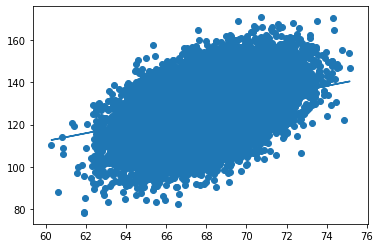

In [41]:
import numpy as np
import matplotlib.pyplot as plt
#весь людей дан в фунтах 1 pounds = 0.45359237 килограмм (кг)
# рост людей дан в дюймах 1 дюйм = 2.54 см
x_dt = np.loadtxt('height.txt',usecols=1,skiprows=1) # рост
y_dt = np.loadtxt('height.txt',usecols=2,skiprows=1) # вес
#x_dt = x_dt * 2.54
#y_dt = y_dt * 0.45359237
x_mean = np.mean(x_dt)
y_mean = np.mean(y_dt)
r_xy = ((x_dt - x_mean)*(y_dt - y_mean)).sum() / (((x_dt - x_mean)**2).sum() *
                                                  ((y_dt - y_mean)**2).sum() )**(0.5)
print(r_xy)

r_xy = 0.9627570970509662
a_0 = 0.03794256505701553
a_1 =  0.30881272657227327


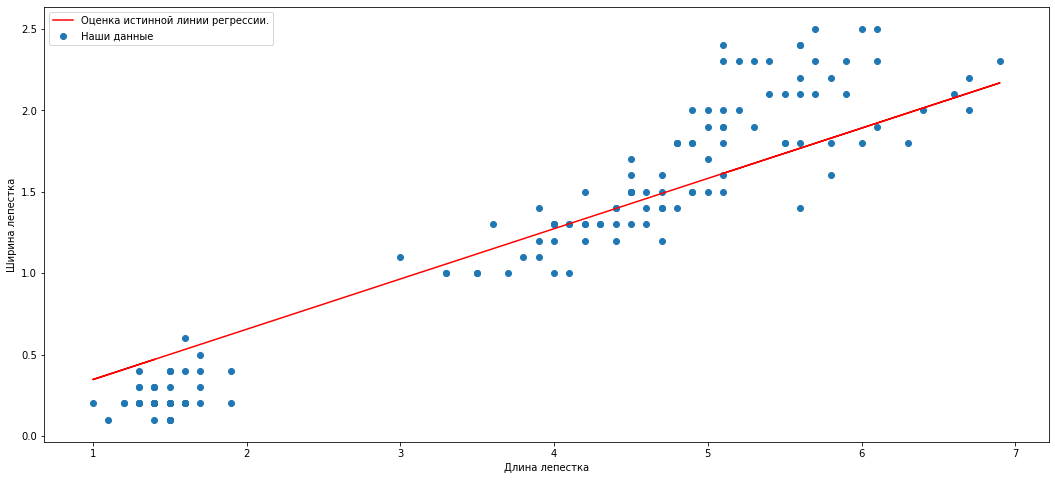

In [49]:
# зависимость ширины лепестка от его длины
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dt = pd.read_csv('IRIS.csv', usecols=['petal_length', 'petal_width'])
x_dt = np.array(dt['petal_length'].tolist())
y_dt = np.array(dt['petal_width'].tolist())
x_mean = np.mean(x_dt)
y_mean = np.mean(y_dt)
n = 500
r_xy = ((x_dt - x_mean)*(y_dt - y_mean)).sum() / (((x_dt - x_mean)**2).sum() *
                                                  ((y_dt - y_mean)**2).sum() )**(0.5)
print('r_xy =', r_xy)
a_0 = (y_mean  * (x_dt**2).sum() / n - x_mean*(x_dt * y_dt).sum() / n) / ((x_dt**2).sum()
                                                                          / n  - x_mean**2)
print('a_0 =',a_0)
a_1 = ((x_dt * y_dt).sum() / n  - y_mean * x_mean ) / ((x_dt**2).sum() / n  - x_mean**2)
print('a_1 = ',a_1)
y = x_dt * a_1 + a_0
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)
ax.plot(x_dt,y,label='Оценка истинной линии регрессии.',color = 'r')
plt.scatter(x_dt,y_dt,label='Наши данные')
ax.set_xlabel('Длина лепестка')
ax.set_ylabel('Ширина лепестка')
ax.legend()
plt.show()

r_xy = 0.97824161848876
a_0 = 25792.200198668714
a_1 =  9449.962321455081


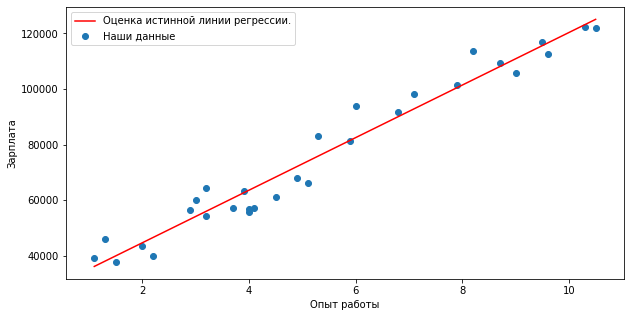

In [92]:
# зависимость зарплат от опыта работа 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
x_name = 'YearsExperience'
y_name = 'Salary'
dt = pd.read_csv('Salary_Data.csv', usecols=['{}'.format(x_name), '{}'.format(y_name)])
x_dt = np.array(dt['{}'.format(x_name)].tolist())
y_dt = np.array(dt['{}'.format(y_name)].tolist())
x_mean = np.mean(x_dt)
y_mean = np.mean(y_dt)
n = len(x_dt)
r_xy = ((x_dt - x_mean)*(y_dt - y_mean)).sum() / (((x_dt - x_mean)**2).sum() *
                                                  ((y_dt - y_mean)**2).sum() )**(0.5)
print('r_xy =', r_xy)
a_0 = (y_mean  * (x_dt**2).sum() / n - x_mean*(x_dt * y_dt).sum() / n) / ((x_dt**2).sum()
                                                                          / n  - x_mean**2)
print('a_0 =',a_0)
a_1 = ((x_dt * y_dt).sum() / n  - y_mean * x_mean ) / ((x_dt**2).sum() / n  - x_mean**2)
print('a_1 = ',a_1)
y = x_dt * a_1 + a_0
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(x_dt,y,label='Оценка истинной линии регрессии.',color = 'r')
plt.scatter(x_dt,y_dt,label='Наши данные')
ax.set_xlabel('Опыт работы')
ax.set_ylabel('Зарплата')
ax.legend()
plt.show()

(835, 20)
    SeasonEnd                   Team  Playoffs   W   PTS  oppPTS    FG   FGA  \
0        1980          Atlanta Hawks         1  50  8573    8334  3261  7027   
1        1980         Boston Celtics         1  61  9303    8664  3617  7387   
2        1980          Chicago Bulls         0  30  8813    9035  3362  6943   
3        1980    Cleveland Cavaliers         0  37  9360    9332  3811  8041   
4        1980         Denver Nuggets         0  30  8878    9240  3462  7470   
5        1980        Detroit Pistons         0  16  8933    9609  3643  7596   
6        1980  Golden State Warriors         0  24  8493    8853  3527  7318   
7        1980        Houston Rockets         1  41  9084    9070  3599  7496   
8        1980         Indiana Pacers         0  37  9119    9176  3639  7689   
9        1980      Kansas City Kings         1  47  8860    8603  3582  7489   
10       1980     Los Angeles Lakers         1  60  9438    8954  3898  7368   
11       1980        Milwaukee

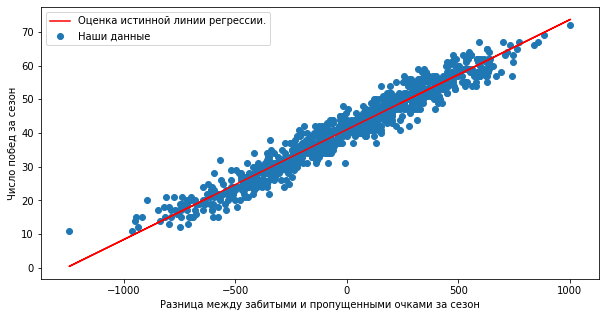

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dt = pd.read_csv('NBA_train.csv')
print(dt.shape)
print(dt.head(15))
x_name = 'oppPTS'
y_name = 'W'
x_dt = np.array(dt['PTS'].tolist()) - np.array(dt['oppPTS'].tolist()) 
y_dt = np.array(dt['{}'.format(y_name)].tolist())
x_mean = np.mean(x_dt)
y_mean = np.mean(y_dt)
n = len(x_dt)
r_xy = ((x_dt - x_mean)*(y_dt - y_mean)).sum() / (((x_dt - x_mean)**2).sum() *
                                                  ((y_dt - y_mean)**2).sum() )**(0.5)
print('r_xy =', r_xy)
a_0 = (y_mean  * (x_dt**2).sum() / n - x_mean*(x_dt * y_dt).sum() / n) / ((x_dt**2).sum()
                                                                          / n  - x_mean**2)
print('a_0 =',a_0)
a_1 = ((x_dt * y_dt).sum() / n  - y_mean * x_mean ) / ((x_dt**2).sum() / n  - x_mean**2)
print('a_1 = ',a_1)
y = x_dt * a_1 + a_0
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(x_dt,y,label='Оценка истинной линии регрессии.',color = 'r')
plt.scatter(x_dt,y_dt,label='Наши данные')
ax.set_xlabel('Разница между забитыми и пропущенными очками за сезон')
ax.set_ylabel('Число побед за сезон')
ax.legend()
plt.show()
